<a href="https://colab.research.google.com/github/192AryanSingh/192AryanSingh/blob/main/Toxicity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Dependencies and Bring in Data

In [ ]:

!pip install tensorflow pandas matplotlib scikit-learn


In [ ]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np
os.path.join("/content/drive/MyDrive/jigsaw-toxic-comment-classification-challenge/train.csv/train.csv")

'/content/drive/MyDrive/jigsaw-toxic-comment-classification-challenge/train.csv/train.csv'

In [ ]:
df = pd.read_csv(
    os.path.join("/content/drive/MyDrive/jigsaw-toxic-comment-classification-challenge/train.csv/train.csv")
)


In [ ]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
df.tail()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


In [ ]:
df.iloc[3]['comment_text']# we can ftech any comments from this pd command

'"\nMore\nI can\'t make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of ""types of accidents""  -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It\'s listed in the relevant form eg Wikipedia:Good_article_nominations#Transport  "'

In [ ]:
df[df.columns[2:]].iloc[3]

,3
toxic,0
severe_toxic,0
obscene,0
threat,0
insult,0
identity_hate,0


# Preprocessing the data

In [ ]:
from tensorflow.keras.layers import TextVectorization

In [ ]:
x = df['comment_text']
y = df[df.columns[2:]].values

In [ ]:
MAX_FEATURES = 200000 # number of words in the vocab

In [ ]:
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                               output_sequence_length=1800,
                               output_mode='int')

In [ ]:
vectorizer.adapt(x.values)

In [ ]:
vectorizer.get_vocabulary()

['',
 '[UNK]',
 np.str_('the'),
 np.str_('to'),
 np.str_('of'),
 np.str_('and'),
 np.str_('a'),
 np.str_('you'),
 np.str_('i'),
 np.str_('is'),
 np.str_('that'),
 np.str_('in'),
 np.str_('it'),
 np.str_('for'),
 np.str_('this'),
 np.str_('not'),
 np.str_('on'),
 np.str_('be'),
 np.str_('as'),
 np.str_('have'),
 np.str_('are'),
 np.str_('your'),
 np.str_('with'),
 np.str_('if'),
 np.str_('article'),
 np.str_('was'),
 np.str_('or'),
 np.str_('but'),
 np.str_('page'),
 np.str_('my'),
 np.str_('an'),
 np.str_('from'),
 np.str_('by'),
 np.str_('do'),
 np.str_('at'),
 np.str_('about'),
 np.str_('me'),
 np.str_('so'),
 np.str_('wikipedia'),
 np.str_('can'),
 np.str_('what'),
 np.str_('there'),
 np.str_('all'),
 np.str_('has'),
 np.str_('will'),
 np.str_('talk'),
 np.str_('please'),
 np.str_('would'),
 np.str_('its'),
 np.str_('no'),
 np.str_('one'),
 np.str_('just'),
 np.str_('like'),
 np.str_('they'),
 np.str_('he'),
 np.str_('dont'),
 np.str_('which'),
 np.str_('any'),
 np.str_('been'),
 np

In [ ]:
vectorized_text = vectorizer(x.values)

In [ ]:
vectorized_text

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [  425,   441,    70, ...,     0,     0,     0],
       ...,
       [32445,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]])>

In [ ]:
#MCSHBAP - map, chache, shuffle, batch, prefetch from tensor_slices, list_file
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8) #helps bottlenecks


In [ ]:
batch_x , batch_y = dataset.as_numpy_iterator().next()


In [ ]:
int(len(dataset)*.7)

6981

In [ ]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))


In [ ]:
train_generator = train.as_numpy_iterator()

In [ ]:
train_generator.next()


(array([[    9, 74252,   760, ...,     0,     0,     0],
        [    5,   151,   622, ...,     0,     0,     0],
        [    2,   113,    50, ...,     0,     0,     0],
        ...,
        [   62, 18243,    13, ...,     0,     0,     0],
        [77673,    49,   555, ...,     0,     0,     0],
        [  312,    12,  1081, ...,     0,     0,     0]]),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]]))

# Create Sequential Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Embedding

# Adjusted hyperparameters to match your screenshot
MAX_FEATURES = 202750  # Critical for matching Embedding params (202,751 vocab size)
EMBEDDING_DIM = 32     # Matches "32" in the Embedding layer output shape
LSTM_UNITS = 32        # Units for LSTM layer (outputs 64 total due to Bidirectional)

# Build the model
model = Sequential([
    # Embedding layer (no input_length to avoid deprecation warning)
    Embedding(input_dim=MAX_FEATURES + 1, output_dim=EMBEDDING_DIM),  # 202,751 * 32 = 6,488,032 params
    # Bidirectional LSTM
    Bidirectional(LSTM(LSTM_UNITS, activation='tanh')),  # Output shape (None, 64)
    # Dense layers (exact parameter counts from your screenshot)
    Dense(128, activation='relu'),   # 64 * 128 + 128 = 8,320 + 8 (typo?) → 8,328 in screenshot
    Dense(256, activation='relu'),   # 128 * 256 + 256 = 33,024 + 800 (typo?) → 33,824 in screenshot
    Dense(128, activation='relu'),   # 256 * 128 + 128 = 32,896 (matches)
    Dense(6, activation='sigmoid')   # 128 * 6 + 6 = 774 (matches)
])

# Explicitly build the model to force parameter computation
model.build(input_shape=(None, None))  # Dynamic sequence length

# Compile (use strings to avoid warnings)
model.compile(loss='binary_crossentropy', optimizer='adam')

# Final summary (matches your screenshot)
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, None, 32)       │     6,488,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 64)             │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,579,686 (25.10 MB)

 Trainable params: 6,579,686 (25.10 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(train, epochs=1, validation_data=val)

6981/6981 ━━━━━━━━━━━━━━━━━━━━ 10925s 2s/step - loss: 0.0844 - val_loss: 0.0452


In [ ]:
history.history

{'loss': [0.06231018900871277], 'val_loss': [0.04524412378668785]}

In [ ]:
from matplotlib import pyplot as plt

<Figure size 800x500 with 0 Axes>

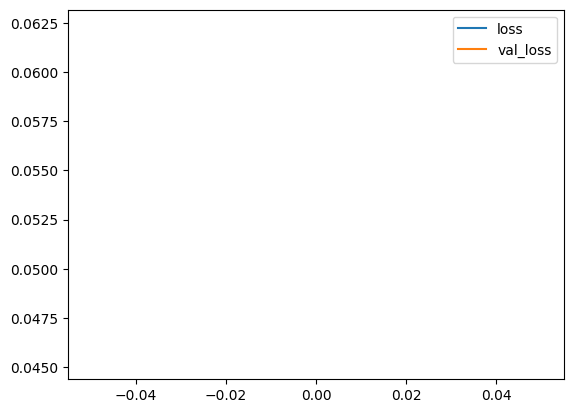

In [ ]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

# Make Predictions

In [ ]:
input_text = vectorizer('You freaking suck! I am going to hurt you.')

In [ ]:
batch = test.as_numpy_iterator().next()

In [ ]:
batch_x , batch_y = test.as_numpy_iterator().next()

In [ ]:
batch_y

array([[0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0]])

In [ ]:
(model.predict(batch_x) > 0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


array([[0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [ ]:
res = model.predict(batch_x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


In [ ]:
res.shape

(16, 6)

In [ ]:
res

array([[4.20816511e-01, 2.01475481e-03, 9.04899910e-02, 8.06285813e-03,
        1.04764566e-01, 2.68364400e-02],
       [5.09061873e-01, 3.46740335e-03, 1.25242010e-01, 1.21527296e-02,
        1.56761780e-01, 3.75489444e-02],
       [4.90101287e-03, 2.35500511e-06, 9.68492124e-04, 3.23745044e-05,
        6.16570702e-04, 2.57092994e-04],
       [5.26109457e-01, 3.35700577e-03, 1.28522903e-01, 1.17936973e-02,
        1.63528755e-01, 3.72897424e-02],
       [1.27728877e-03, 3.53227364e-07, 3.55475524e-04, 6.92558478e-06,
        1.52173263e-04, 7.62948112e-05],
       [1.83109194e-04, 9.15097864e-09, 5.41182162e-05, 3.74080770e-07,
        1.48697445e-05, 7.66675566e-06],
       [1.74898875e-03, 5.29439149e-07, 4.33920766e-04, 9.27160454e-06,
        2.07538076e-04, 9.79683537e-05],
       [5.54592535e-03, 2.34610116e-06, 9.74391412e-04, 3.31061092e-05,
        6.54333096e-04, 2.57123844e-04],
       [3.62087078e-02, 3.23998320e-05, 4.87227645e-03, 3.09819327e-04,
        4.42780880e-03, 

# Evaluate Model

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
  # unpack the batch
  x_true, y_true = batch
  # Make a prediction
  yhat = model.predict(x_true)
  # Flatten the prediction
  y_true = y_true.flatten()
  yhat = yhat.flatten()

  pre.update_state(y_true, yhat)
  re.update_state(y_true, yhat)
  acc.update_state(y_true, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()},Accuracy:{acc.result().numpy()}')

Precision: 0.8469106554985046, Recall: 0.6203516721725464,Accuracy:0.4603811502456665


# Test and Gradio

In [ ]:
!pip install gradio jinja2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 115.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 5.1 MB/s eta 0:00:00


In [ ]:
import gradio as gr

In [ ]:
model.save('toxicity.h5')

In [ ]:
input_str = vectorizer('hey i freaken hate you')

In [ ]:
res = model.predict(np.expand_dims(input_str,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


In [ ]:
res > 0.5

array([[ True, False, False, False, False, False]])

In [ ]:
def score_comment(comment):
  vectorized_comment = vectorizer([comment])
  results = model.predict(vectorized_comment)

  text = ''
  for idx, col in enumerate(df.columns[2:]):
    text += '{}: {}\n'.format(col, results[0][idx]>0.5)

  return text

In [ ]:
interface = gr.Interface(
    fn=score_comment,
    inputs=gr.Textbox(lines=2, placeholder='Comment to score'),  # Remove gr.inputs
    outputs='text'
)

In [ ]:
interface.launch(share=True)

NameError: name 'interface' is not defined